# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [37]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [38]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [39]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [42]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/tpancier/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


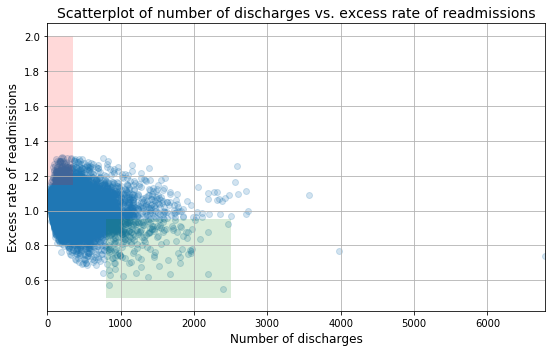

In [35]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

In [56]:
# Checking null values from Excess readmission ration:
clean_hospital_read_df['Excess Readmission Ratio'][pd.notnull(clean_hospital_read_df['Excess Readmission Ratio'])]

1832     1.0914
1699     1.0961
1774     1.0934
1853     1.0908
1290     1.1123
1602     1.0992
2048     1.0847
2441     1.0738
2512     1.0720
2825     1.0651
3828     1.0444
5125     1.0228
3312     1.0548
2378     1.0756
2670     1.0683
2944     1.0622
1238     1.1149
1395     1.1082
3145     1.0581
3207     1.0570
1471     1.1043
1838     1.0912
4092     1.0398
2252     1.0784
3087     1.0593
4317     1.0359
5309     1.0203
2952     1.0621
3406     1.0530
738      1.1468
          ...  
7147     0.9935
897      1.1358
13326    0.8384
7872     0.9839
9444     0.9627
13723    0.6350
1605     1.0991
12910    0.8747
2758     1.0663
7934     0.9831
1352     1.1099
3042     1.0605
1448     1.1055
2846     1.0647
8249     0.9788
3202     1.0571
13730    0.5495
2440     1.0738
11545    0.9248
1805     1.0925
8818     0.9712
572      1.1637
136      1.2577
1698     1.0962
1242     1.1148
8126     0.9804
6643     1.0003
1892     1.0896
13615    0.7682
13666    0.7379
Name: Excess Readmission

In [65]:
# Removing null values from excess readmission ratio:

excess_discharge = clean_hospital_read_df[['Excess Readmission Ratio','Number of Discharges']].dropna(how='any')

,Excess Readmission Ratio,Number of Discharges


In [66]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(excess_discharge['Number of Discharges'], excess_discharge['Excess Readmission Ratio'])

# Print the result
print(r)

-0.0973979435108


**Answer A:** based on the negative pearson correlation, I agree that rate of readmissions is likely trending down with increasing number of discharges. However the correlatio is weak.

## Answer B (below):

In [91]:
clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges'] < 100].mean()

1.0226183501683506

In [107]:
excess_readm_1 = clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges'] < 100]

In [108]:
excess_readm_1 = excess_readm_1[pd.notnull(excess_readm_1)]

**Hypothesis test:**
- Null 1: mean of excess readmission ratio is 1.023 for Number of Discharges < 100
- Alternate 1: mean of excess readmission ratio is different than 1.023 for Number of Discharges < 100


In [112]:
from scipy.stats import sem

# statistic minus the claim:
diff_mean = excess_readm_1.mean() - 1.023

# standard error:
serr = sem(excess_readm_1)
serr


0.0016821298911009841

In [113]:
zscore = diff_mean / serr
zscore 

-0.22688487593520365

In [120]:
import scipy.stats as st
p_value = st.norm.cdf(zscore)*2
p_value

0.82051326266255764

High p value indicate that the null hypothesis cannot be rejected

In [121]:
moe = 2.58 * serr
moe

0.0043398951190405394

In [122]:
exc_read_low = excess_readm_1.mean() - moe
exc_read_high = excess_readm_1.mean() + moe
exc_read_low

1.01827845504931

In [123]:
exc_read_high

1.0269582452873911

For 99% confidence level, excess readmission mean may vary between 1.01827845504931 and 1.0269582452873911. As the confidence interval contains the null hypothesis, it cannot be rejected.

In [141]:
# Bootstrap:

import numpy as np

bs_size = 10000

bs_replicates = np.empty(bs_size)

np.random.seed(10)

for i in range(bs_size):
    bs_sample = np.random.choice(excess_readm_1, size=len(excess_readm_1))
    bs_replicates[i] = np.mean(bs_sample)
    diff_mean_replicates = bs_replicates - 1.023

diff_mean_replicates

array([ 0.00048409,  0.00086978, -0.00145732, ..., -0.00070194,
       -0.00032618, -0.00147399])

In [142]:
diff_mean_replicates.mean()

-0.00037019189393929929

The difference between a bootstrap sample mean and 1.023 is aproximately zero, so the 1.023 can be considered the real mean (null hypothesis).

In [143]:
conf_int_mean = np.percentile(diff_mean_replicates, [0.5, 99.5])
conf_int_mean

array([-0.00454572,  0.00401426])

Null hypothesis is within the confidence interval

Hypothesis test:
- Null 2: proportion of readmission ration > 1 is 63%
- Alternate 2: proportion of readmission ration > 1 is different 63%

In [130]:
len(excess_readm_1[excess_readm_1 > 1]) / len(excess_readm_1)

0.6321548821548821

In [137]:
# Bootstrap:

import numpy as np

bs_size = 10000

bs_replicates = np.empty(bs_size)

np.random.seed(10)

for i in range(bs_size):
    bs_sample = np.random.choice(excess_readm_1, size=len(excess_readm_1))
    bs_replicates[i] = np.sum(bs_sample > 1) / len(bs_sample)
    diff_prop_replicates = bs_replicates - 0.63

diff_prop_replicates.mean()

0.0022010942760942718

The mean is very close to zero, so null hypothesis can be accepted

In [140]:
conf_int = np.percentile(diff_prop_replicates, [0.5, 99.5])
conf_int

array([-0.03320286,  0.03666667])

Null hypothesis is within the confidence interval

**Hypothesis test:**
- Null 3: mean of excess readmission ratio is 0.978 for Number of Discharges > 1000
- Alternate 3: mean of excess readmission ratio is different than 0.978 for Number of Discharges > 1000

In [150]:
excess_readm_2 = clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges'] > 1000]
excess_readm_2 = excess_readm_2[pd.notnull(excess_readm_2)]

In [151]:
excess_readm_2.mean()

0.9783354211663071

In [155]:
# Bootstrap:

import numpy as np

bs_size = 10000

bs_replicates = np.empty(bs_size)

np.random.seed(10)

for i in range(bs_size):
    bs_sample = np.random.choice(excess_readm_2, size=len(excess_readm_2))
    bs_replicates[i] = np.mean(bs_sample)
    diff_mean_replicates = bs_replicates - 0.978

diff_mean_replicates

array([-0.00042268, -0.00079698,  0.00967711, ..., -0.00902592,
       -0.0052013 , -0.00489654])

In [156]:
diff_mean_replicates.mean()

0.00037582049676028364

The difference between a bootstrap sample mean and 0.978 is very low, so the 0.978 can be considered the real mean (null hypothesis).

In [157]:
conf_int = np.percentile(diff_mean_replicates, [0.5, 99.5])
conf_int

array([-0.01385396,  0.01456697])

Null hypothesis is within the confidence interval

**Hypothesis test:**
- Null 4: proportion of readmission ration > 1 is 44%
- Alternate 4: proportion of readmission ration > 1 is different 44%

In [158]:
# Bootstrap:

import numpy as np

bs_size = 10000

bs_replicates = np.empty(bs_size)

np.random.seed(10)

for i in range(bs_size):
    bs_sample = np.random.choice(excess_readm_2, size=len(excess_readm_2))
    bs_replicates[i] = np.sum(bs_sample > 1) / len(bs_sample)
    diff_prop_replicates = bs_replicates - 0.44

diff_prop_replicates.mean()

0.0050565874730021578

The mean of the proportions difference is very close to zero, so the null hypothesis cannot be rejected and 44% can be consider the proportion.

In [159]:
conf_int_prop = np.percentile(diff_prop_replicates, [0.5, 99.5])
conf_int_prop

array([-0.05339093,  0.06539957])

Null hypothesis is contained in the confidence interval, no null hypothesis cannot be rejected.

**Statistical significance vs practical significance:**

Significant differences (i.e., reject the null hypothesis) means that differences in test statistic are not likely due to sampling error. Statistical significance is used to determine if a result is valid for a population or not.

Prtactical significance considers if the differences have real meaning. This analysis requires some subject matter expertise. 

In the example above, the difference between the mean and proportion in the analysis and the one calculated is practicaly the same with some rounding difference. A hypothesis test to verify the statistical significance wouldn't be necessary.

**Plot:**

The scatterplot above with the red and green boxes doesn't allow a clear trend to be shown.

slope = -326.997250412 Number of discharge / Excess Readmission Ration
intercept = 694.917175592 Number of discharge


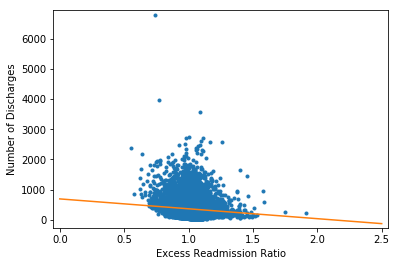

In [165]:
# Plot the scatter plot:
_ = plt.plot(clean_hospital_read_df['Excess Readmission Ratio'], clean_hospital_read_df['Number of Discharges'], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('Number of Discharges')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(excess_discharge['Excess Readmission Ratio'], excess_discharge['Number of Discharges'], 1)

# Print the results to the screen
print('slope =', a, 'Number of discharge / Excess Readmission Ration')
print('intercept =', b, 'Number of discharge')

# Make theoretical line to plot
x = np.array([0, 2.5])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

The correlation is week (